<a href="https://colab.research.google.com/github/nithinghosh/machine_learning/blob/master/Detection_of_Pneumonia_from_Chest_X_Ray_Images_1_0_0_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Summery
<pre>
Author           :Nithin Ghosh R J 
Project Name     : Detection of Pneumonia from Chest X-Ray Images using Convolutional Neural Network, 
                   and Transfer Learning.
Description      : 1. Detected Pneumonia from Chest X-Ray images using Custom Deep Convololutional Neural Network and by                         retraining pretrained model “InceptionV3” with 5856 images of X-ray (1.15GB).
                   2. For retraining removed output layers, freezed first few layers and fine-tuned model for 
                      two new label classes (Pneumonia and Normal).
                   3. With Custom Deep Convololutional Neural Network attained testing accuracy 89.53% and loss 0.41.
Method           : 
Tools/Library    : Python, Keras, PyTorch, TensorFlow
Version History  : 1.0.0.0
Current Version  : 1.0.0.3
Last Update      : 12.16.2018
Comments         : Please use Anaconda editor for convenience of visualization.
</pre>

<!---
#### Library/Tools Version
- Python - v3.6.7
- argparse
- random
- numpy
- shutil
- gc
- re
- Keras - 2.2.4
- Keras-preprocessing - v1.0.5
- TensorFlow - 1.12
- PIL/Pillow - 5.1.0
- Matplotlib - 2.2.2
- scikit-learn - 0.19.1
- mlxtend - 0.14.0
-->

<pre>
<b>Dataset Details</b>
Dataset Name            : Chest X-Ray Images (Pneumonia)
Number of Class         : 2
Number/Size of Images   : Total      : 5856 (1.15 Gigabyte (GB))
                          Training   : 5216 (1.07 Gigabyte (GB))
                          Validation : 320  (42.8 Megabyte (MB))
                          Testing    : 320  (35.4 Megabyte (MB))

<b>Model Parameters</b>
Machine Learning Library: Keras
Base Model              : InceptionV3 && Custom Deep Convolutional Neural Network
Optimizers              : Adam
Loss Function           : categorical_crossentropy

<b>For Custom Deep Convolutional Neural Network : </b>
<b>Training Parameters</b>
Batch Size              : 64
Number of Epochs        : 30
Training Time           : 2 Hours

<b>Output (Prediction/ Recognition / Classification Metrics)</b>
<!--<b>Validation</b>-->
<b>Testing</b>
Accuracy (F-1) Score    : 89.53%
Loss                    : 0.41
Precision               : 88.37%
Recall (Pneumonia)      : 95.48% (For positive class)
<!--Specificity             : -->
</pre>

### Detailed Performance Report
<pre>
Summary
--------------------------
Loss     : 0.41  
Accuracy : 89.53%

Derived Report
--------------------------
Precision     : 88.37%
Recall        : 95.48%
F1-Score      : 91.79%
        
--------------------------------------------------------------------------------
Report for Model File:  2018-12-15 22-32-00/10-val_acc-0.96-val_loss-0.11.hdf5
--------------------------------------------------------------------------------
              precision    recall  f1-score   support
--------------------------------------------------------------------------------
      Normal       0.91      0.79      0.85       121
   Pneumonia       0.88      0.95      0.92       199
--------------------------------------------------------------------------------
   micro avg       0.89      0.89      0.89       320
   macro avg       0.90      0.87      0.88       320
weighted avg       0.90      0.89      0.89       320
</pre>

In [1]:
# Colab library to upload files to notebook
from google.colab import files

# Install Kaggle library
!pip install -q kaggle

In [2]:
uploaded = files.upload()

Saving kaggle.json to kaggle.json


kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

In [3]:
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/kaggle.json

In [4]:
!chmod 600 /root/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:29<00:00, 38.4MB/s]



In [6]:
!unzip chest-xray-pneumonia.zip 


Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

In [7]:
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

import os
import numpy as np
import pandas as np

import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
print(os.listdir("chest_xray/chest_xray"))

print(os.listdir("chest_xray/chest_xray/train"))

print(os.listdir("chest_xray/chest_xray/test/"))

['.DS_Store', 'val', 'train', 'test']
['NORMAL', '.DS_Store', 'PNEUMONIA']
['NORMAL', '.DS_Store', 'PNEUMONIA']


NORMAL


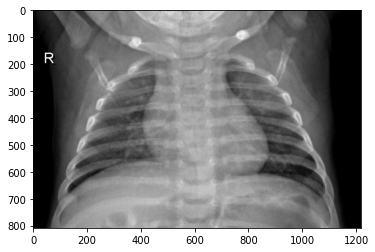

In [9]:
img_name = 'NORMAL2-IM-0588-0001.jpeg'
img_normal = load_img('chest_xray/chest_xray/train/NORMAL/' + img_name)

print('NORMAL')
plt.imshow(img_normal)
plt.show()


PNEUMONIA


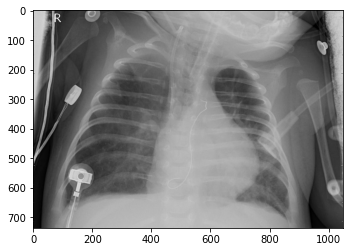

In [10]:
img_name = 'person63_bacteria_306.jpeg'
img_pneumonia = load_img('chest_xray/chest_xray/train/PNEUMONIA/' + img_name)

print('PNEUMONIA')
plt.imshow(img_pneumonia)
plt.show()

##Using Normal CNN


In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

##Using ImageDataGenerator to load the training and validation images

In [12]:
training_dir="chest_xray/chest_xray/train/"
training_generator=ImageDataGenerator(rescale=1/255,featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = False,  # randomly flip images
        vertical_flip=False)
train_generator=training_generator.flow_from_directory(training_dir,target_size=(200,200),batch_size=4,class_mode='binary')

Found 5216 images belonging to 2 classes.


In [13]:
validation_dir="chest_xray/chest_xray/val/"
validation_generator=ImageDataGenerator(rescale=1/255)
val_generator=validation_generator.flow_from_directory(validation_dir,target_size=(200,200),batch_size=4,class_mode='binary')

Found 16 images belonging to 2 classes.


In [14]:
test_dir="chest_xray/chest_xray/test/"
test_generator=ImageDataGenerator(rescale=1/255)
test_generator=test_generator.flow_from_directory(test_dir,target_size=(200,200),batch_size=16,class_mode='binary')

Found 624 images belonging to 2 classes.


##Developing a Convolutional Neural Network for the classification task

In [15]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),input_shape=(200,200,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(256,(3,3),activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
    
])

In [16]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),loss='binary_crossentropy',metrics=['acc'])

In [17]:
history = model.fit_generator(train_generator,
            validation_data = val_generator,
            
            epochs = 30,
            
            verbose = 1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
1304/1304 [==============================] - 100s 71ms/step - loss: 0.5429 - acc: 0.7500 - val_loss: 1.7633 - val_acc: 0.5000
Epoch 2/30
1304/1304 [==============================] - 92s 71ms/step - loss: 0.4454 - acc: 0.7848 - val_loss: 0.4143 - val_acc: 0.8125
Epoch 3/30
1304/1304 [==============================] - 92s 71ms/step - loss: 0.3314 - acc: 0.8674 - val_loss: 0.3989 - val_acc: 0.8750
Epoch 4/30
1304/1304 [==============================] - 92s 71ms/step - loss: 0.2634 - acc: 0.8990 - val_loss: 0.3362 - val_acc: 0.8125
Epoch 5/30
1304/1304 [==============================] - 93s 71ms/step - loss: 0.2277 - acc: 0.9068 - val_loss: 0.5147 - val_acc: 0.7500
Epoch 6/30
1304/1304 [==============================] - 92s 71ms/step - loss: 0.2084 - acc: 0.9145 - val_loss: 1.2859 - val_acc: 0.6250
Epoch 7/30
1304/1304 [==============================] - 92s 71ms/step - loss: 0.1961 - acc: 0.9187 - val_loss: 0.7330 - val_acc: 0.6875
Epoch 8/30
1304/1304 [=========================

In [18]:
print("Loss of the model is - " , model.evaluate(test_generator)[0]*100 , "%")
print("Accuracy of the model is - " , model.evaluate(test_generator)[1]*100 , "%")

39/39 [==============================] - 5s 132ms/step - loss: 0.2392 - acc: 0.9167
Loss of the model is -  23.918941617012024 %
39/39 [==============================] - 5s 133ms/step - loss: 0.2392 - acc: 0.9167
Accuracy of the model is -  91.66666865348816 %
